<h1> Importing <h1>

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import statsmodels.api as sm

In [214]:
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
# from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [215]:
#Load the data
df = pd.read_csv("AirBNB_modified.csv")

In [319]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Month,Year,Seasons,group,pee
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,...,2018-10-19,0.21,6,365,19,October,2018,Fall,Brooklyn,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,...,2019-05-21,0.38,2,355,21,May,2019,Spring,Manhattan,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,...,2019-05-21,1.37,1,365,21,May,2019,Spring,Manhattan,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,...,2019-07-05,4.64,1,194,5,July,2019,Summer,Brooklyn,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,...,2018-11-19,0.10,1,0,19,November,2018,Fall,Manhattan,4.382027


In [216]:
#Analyze the data
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Year
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.372566,7.148369,112.801425,15.650170,2018.317635
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.497816,32.964600,131.610962,9.918687,1.161725
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,2011.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000,6.000000,2018.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000,16.000000,2019.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,24.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,31.000000,2019.000000


In [217]:
df.corr()

/var/folders/l7/_m002gfn2dlgknd23ht94kt00000gq/T/ipykernel_17812/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Year
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.253101,0.133224,0.085616,-0.037469,0.430520
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.254862,0.154954,0.203743,-0.030462,0.271870
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.009120,0.019548,-0.010775,-0.000345,-0.014996
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.131890,-0.114746,0.082754,-0.013109,0.088675
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.022458,0.057460,0.081817,-0.003693,-0.005947
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.094333,0.131313,0.145953,0.003028,-0.014768
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.530182,-0.072408,0.171855,0.029560,0.224396
reviews_per_month,0.253101,0.254862,-0.009120,0.131890,-0.022458,-0.094333,0.530182,1.000000,-0.006818,0.163111,-0.018541,0.383961
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.006818,1.000000,0.225784,0.016579,0.066664
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.163111,0.225784,1.000000,-0.002485,0.289485


In [313]:
df[df['price'] < 0]

print("Number of unique names:", df['name'].nunique())
print("Number of unique host names:", df['host_name'].nunique())
print(df['availability_365'].describe())

Number of unique names: 47873
Number of unique host names: 11448
count    48847.000000
mean       112.799599
std        131.615947
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


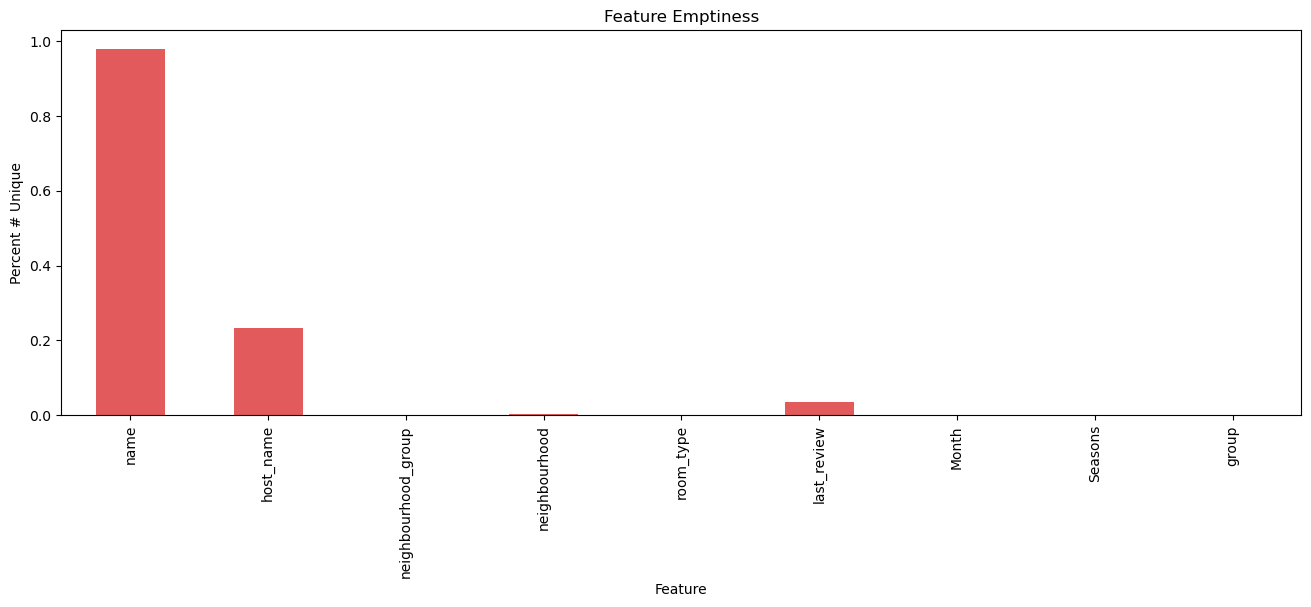

In [276]:
#Selection on Sparse Categorical Features
#Let's have a look at the categorical data to see the number of unique values
categories = df.columns[df.dtypes == 'object']
percentage_unique = df[categories].nunique() / df.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

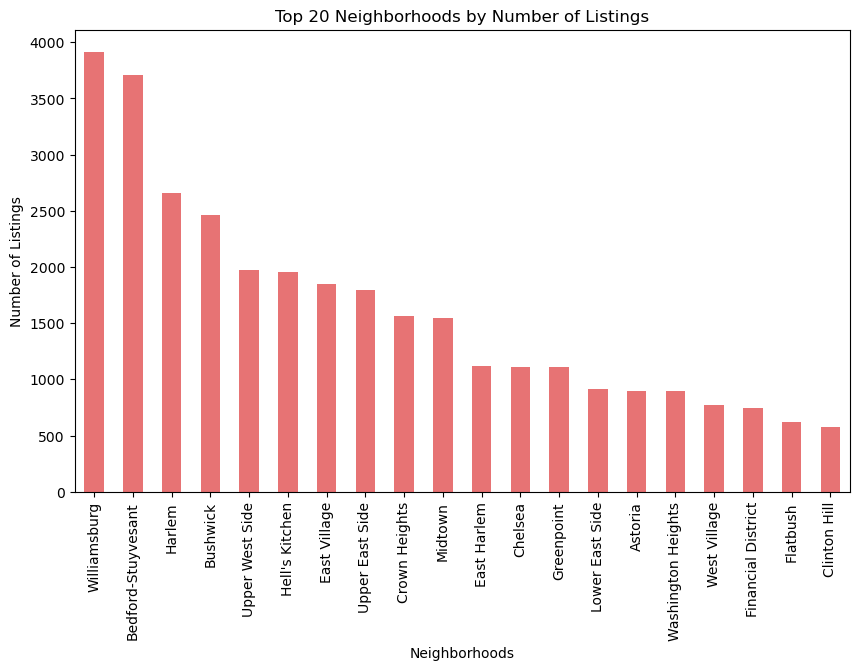

Number of Neighborhoods: 221


In [299]:
count_per_neighborhood = df['neighbourhood'].value_counts()

# Select top 20 neighborhoods
top_20_neighborhoods = count_per_neighborhood.head(20)

# Plot number of listings in each neighborhood
ax = top_20_neighborhoods.plot(kind='bar', figsize=(10, 6), color='#E35A5C', alpha=0.85)
ax.set_title("Top 20 Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhoods")
ax.set_ylabel("Number of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))


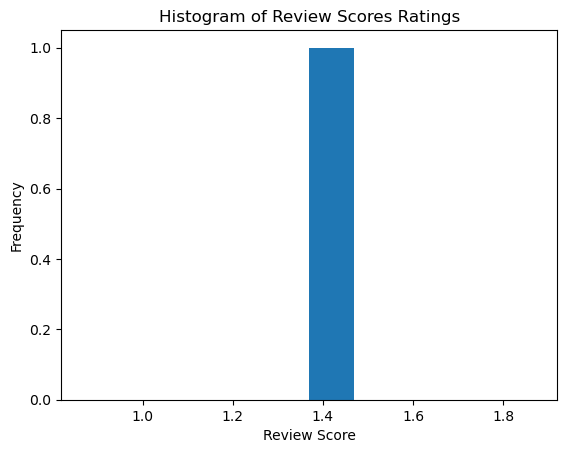

In [293]:
# visualize distribution of review scores ratings
plt.hist(df['reviews_per_month'][df['reviews_per_month'].count()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()


<h2> DATA CLEANING <h2>

In [219]:
#Replace negative prices 
df["price"].replace(0, np.nan, inplace=True)
df.dropna(subset=["price"], inplace=True)



/var/folders/l7/_m002gfn2dlgknd23ht94kt00000gq/T/ipykernel_17812/2491388549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


([<matplotlib.axis.YTick at 0x7fca8a21fa00>,
 [Text(0, 0, 'id'),
  Text(0, 1, 'host_id'),
  Text(0, 2, 'latitude'),
  Text(0, 3, 'longitude'),
  Text(0, 4, 'price'),
  Text(0, 5, 'minimum_nights'),
  Text(0, 6, 'number_of_reviews'),
  Text(0, 7, 'reviews_per_month'),
  Text(0, 8, 'calculated_host_listings_count'),
  Text(0, 9, 'availability_365'),
  Text(0, 10, 'Day_Of_Week'),
  Text(0, 11, 'Year')])

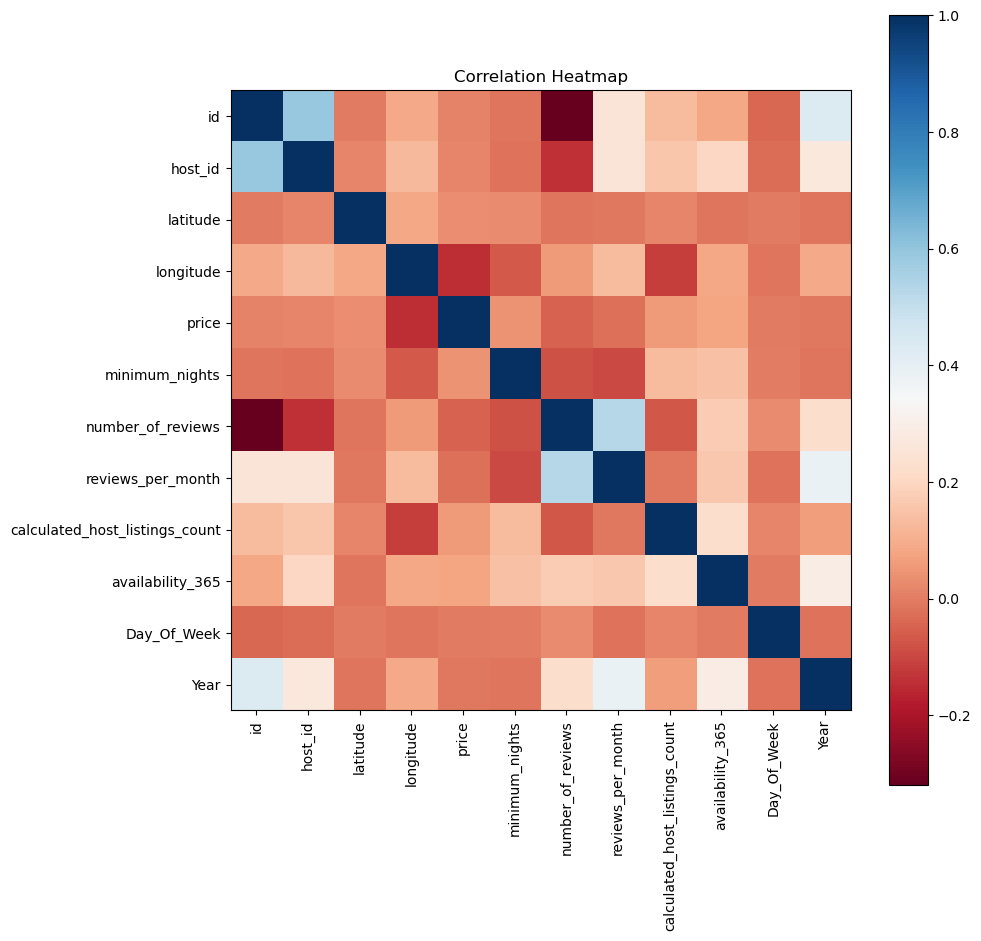

In [147]:
#Get the correlation matrix
corr = df.corr()
#Plot the heatmap
plt.figure(figsize=(10, 10))
plt.title("Correlation Heatmap")
plt.imshow(corr, cmap="RdBu")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

In [222]:
df_copy=df.drop(["id","name","host_id","host_name","number_of_reviews","last_review","reviews_per_month","calculated_host_listings_count","neighbourhood_group","group"],axis=1)
df_copy
#Impute missing values
if df_copy.empty:
    df_copy = df_copy.median()
else:
    df_copy = df_copy

In [267]:
from sklearn.preprocessing import LabelEncoder

#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["room_type"])

#Transform the room_type column
df_copy["room_type"] = le.transform(df_copy["room_type"])

#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["Seasons"])

#Transform the room_type column
df_copy["Seasons"] = le.transform(df_copy["Seasons"])

#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["Month"])

#Transform the room_type column
df_copy["Month"] = le.transform(df_copy["Month"])

In [268]:
#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["neighbourhood"])

#Transform the room_type column
df_copy["neighbourhood"] = le.transform(df_copy["neighbourhood"])

df_copy.tail(1000)
df_copy.isnull().sum()

neighbourhood       0
latitude            0
longitude           0
room_type           0
price               0
minimum_nights      0
availability_365    0
Day_Of_Week         0
Month               0
Year                0
Seasons             0
dtype: int64

In [269]:
#Transform the data
df_copy["price"] = df_copy["price"].astype(float)
from sklearn.tree import DecisionTreeRegressor


In [270]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_copy)
X_standardise = pd.DataFrame(X_scaled,columns=df_copy.columns)
X_standardise.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,Day_Of_Week,Month,Year,Seasons
0,0.012482,-1.493796,-0.437464,0.909804,-0.015712,-0.300301,1.916204,0.337788,1.730334,-0.273339,-2.105696
1,0.288871,0.452513,-0.684426,-0.924033,0.300631,-0.300301,1.840224,0.539422,0.940715,0.587399,-0.885494
2,-0.191173,1.468489,0.222618,0.909804,-0.011549,-0.200406,1.916204,0.539422,0.940715,0.587399,-0.885494
3,-0.962153,-0.803336,-0.164289,-0.924033,-0.265456,-0.300301,0.616956,-1.073652,-0.243714,0.587399,0.334708
4,-0.671217,1.275747,0.177342,-0.924033,-0.302917,0.149224,-0.857045,0.337788,1.335524,-0.273339,-2.105696


In [321]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_copy, df_copy["price"], test_size=0.25)


In [228]:
#Create the decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [229]:
#Evaluate the model on the test set
score = model.score(X_test, y_test)

In [230]:
#Print the score
print(score)

0.9956273531941501


In [233]:
score = model.score(X_train,y_train )
print(score)

1.0


/var/folders/l7/_m002gfn2dlgknd23ht94kt00000gq/T/ipykernel_17812/3722270763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pee'])


<Axes: xlabel='pee', ylabel='Density'>

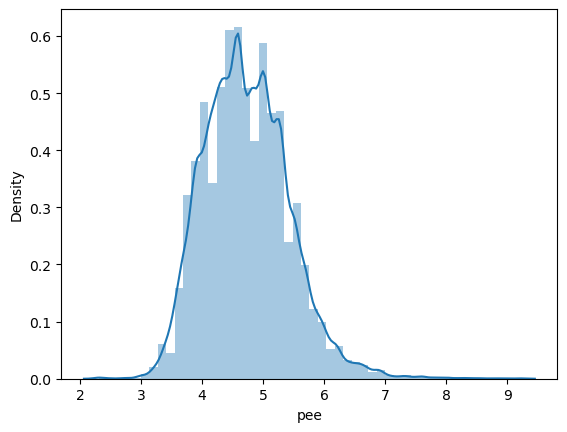

In [315]:
sns.distplot(df['pee'])

/var/folders/l7/_m002gfn2dlgknd23ht94kt00000gq/T/ipykernel_17812/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

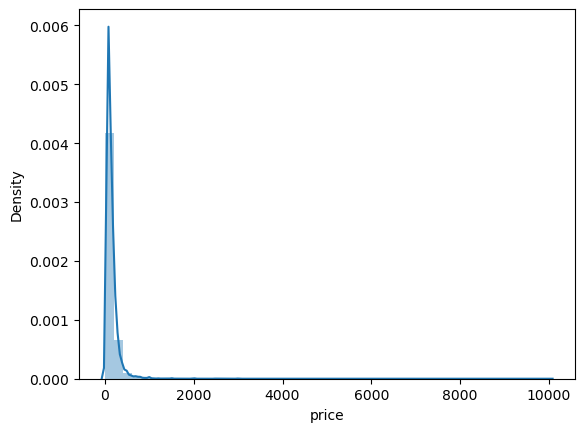

In [177]:
sns.distplot(df['price'])

In [165]:
df2 = df[df['price'] > 1]
df2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Month,Year,Seasons,group,pee
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,...,2018-10-19,0.21,6,365,19,October,2018,Fall,Brooklyn,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,...,2019-05-21,0.38,2,355,21,May,2019,Spring,Manhattan,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,...,2019-05-21,1.37,1,365,21,May,2019,Spring,Manhattan,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,...,2019-07-05,4.64,1,194,5,July,2019,Summer,Brooklyn,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,...,2018-11-19,0.10,1,0,19,November,2018,Fall,Manhattan,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48853,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,...,2019-07-08,1.37,2,9,8,July,2019,Summer,Brooklyn,4.248495
48854,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,...,2019-07-08,1.37,2,36,8,July,2019,Summer,Brooklyn,3.688879
48855,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,...,2019-07-08,1.37,1,27,8,July,2019,Summer,Manhattan,4.744932
48856,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,...,2019-07-08,1.37,6,2,8,July,2019,Summer,Manhattan,4.007333


In [317]:
np.array(10**df['pee'])

array([100912.81146786, 260675.6122265 , 102479.09797965, ...,
        55581.73872195,  10170.28645158,  31608.92094795])

In [316]:
df['pee'] = np.log(df2['price'])

In [322]:
print("Skewness: %f" % df['pee'].skew())
print("Kurtosis: %f" % df['pee'].kurt())

Skewness: 0.608508
Kurtosis: 1.303110


In [237]:

dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100,random_state=0)
lasso = Lasso(alpha=1.0)
RidgeR = ridge = Ridge(alpha=1.0)
LinearR = lr = LinearRegression()
Adab = adaboost = AdaBoostRegressor()
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
StackingR = stacking_reg = StackingRegressor(estimators=[('lr', model1), ('dt', model2)]) 



listr = [dt, rf, lasso,RidgeR,LinearR,Adab,StackingR]

In [238]:
all_models = []
for i in listr:
    i.fit(X_train, y_train)
    test_y_pred = i.predict(X_test)
    train_y_pred = i.predict(X_train)
    
    train_r2 = r2_score(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)
    
    test_r2 = r2_score(y_test, test_y_pred)
    test_mse = mean_squared_error(y_test, test_y_pred)
    test_mae = mean_absolute_error(y_test, test_y_pred)
    test_rmse = mean_squared_error(y_test, test_y_pred, squared=False)
    
    Machine_Learning_Model = ['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test']
    Model = [train_r2, test_r2,train_mse, test_mse,train_rmse,test_rmse, train_mae, test_mae],
    all_models.append(Model)
    
dtr = all_models[0][0]
rfr = all_models[1][0]
lassor = all_models[2][0]
RidgeR = all_models[3][0]
LinearR = all_models[4][0]
Adab = all_models[5][0]
StackingR =  all_models[6][0]

In [239]:
destree = pd.DataFrame(dtr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Decision Tree'])
ranforest = pd.DataFrame(rfr, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Random forest'])
lassoc = pd.DataFrame(lassor, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Lasso'])
Ridgereg = pd.DataFrame(RidgeR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Ridge'])
linearR = pd.DataFrame(LinearR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Linear Regression'])
Adaboost = pd.DataFrame(Adab, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Adaboost Regression'])
StackingRegressor = pd.DataFrame(StackingR, index =['R2-train','R2-test','MSE-train','MSE-test','RSME-train','RSME-test','MAE-train','MAE-test'],   columns =['Stacking Regression'])

In [240]:
dfs = [destree, ranforest, lassoc, Ridgereg, linearR, Adaboost, StackingRegressor]

# Merge the DataFrames
merged_df = pd.concat(dfs, axis=1)
merged_df

,Decision Tree,Random forest,Lasso,Ridge,Linear Regression,Adaboost Regression,Stacking Regression
R2-train,1.000000,0.999680,1.000000,1.000000e+00,1.000000e+00,0.896627,1.000000
R2-test,0.999241,0.998808,1.000000,1.000000e+00,1.000000e+00,0.873056,1.000000
MSE-train,0.000000,19.371619,0.000016,1.336244e-14,2.261776e-25,6266.696049,0.022948
MSE-test,37.214789,58.418590,0.000013,1.050929e-14,1.743927e-25,6220.929983,0.018583
RSME-train,0.000000,4.401320,0.004061,1.155960e-07,4.755813e-13,79.162466,0.151487
RSME-test,6.100393,7.643205,0.003652,1.025148e-07,4.176035e-13,78.872872,0.136319
MAE-train,0.000000,0.106420,0.001532,3.713085e-08,1.723074e-13,69.719225,0.057121
MAE-test,0.154356,0.176694,0.001513,3.649386e-08,1.692016e-13,69.556972,0.056435


In [323]:
from sklearn.metrics import mean_squared_error, r2_score

#import the regressors
from sklearn.ensemble import RandomForestRegressor

#create regressor object
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
lasso = Lasso(alpha=0.1, random_state=42)
#Model Fitting
random_forest.fit(X_train, y_train)

#Test Predictions
rf_test_y_pred = random_forest.predict(X_test)

#Test assessment
mse = mean_squared_error(y_test, rf_test_y_pred)
r2 = r2_score(y_test, rf_test_y_pred)
print(f"Testing Mean Squared Error: {mse}")
print(f"Testing R-squared: {r2}")

#train Predictions
rf_train_y_pred = random_forest.predict(X_train)

#Train assessment
mse = mean_squared_error(y_train, rf_train_y_pred)
r2 = r2_score(y_train, rf_train_y_pred)
print(f"\n\nTraining Mean Squared Error: {mse}")
print(f"Training R-squared: {r2}")

Testing Mean Squared Error: 38.833557738290175
Testing R-squared: 0.9991709461214263


Training Mean Squared Error: 7.28697099222055
Training R-squared: 0.9998812093273816


In [254]:
print(rf_train_y_pred)
print("\n", y_train)

[180.  70. 120. ...  85. 250.  55.]

 31104     70.0
33825    108.0
14500    250.0
23400    134.0
27498    180.0
         ...  
11284     84.0
44743    485.0
38169     80.0
860      180.0
15795     85.0
Name: price, Length: 39077, dtype: float64


In [262]:
print(rf_test_y_pred)
print("\n", y_test)

[ 52.  75.  85. ... 100. 180.  65.]

 7762     105.0
23882     40.0
30518     35.0
28922    195.0
19484     90.0
         ...  
18798    129.0
29530    175.0
550      100.0
14337     40.0
37206     59.0
Name: price, Length: 9770, dtype: float64


<h1> Random Forest Regresssor <h1>

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_copy, df_copy['price'], test_size=0.2, random_state=42)

# Define the individual regression models
estimators = [
    ('linear', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=0)),
    ('knn', KNeighborsRegressor())
]

# Create the stacking regressor with a meta-regressor
stacked_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Fit the stacking regressor
stacked_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacked_reg.predict(X_test)

#rf_test_y_pred = random_forest.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.590485908319474e-23
R-squared (R2): 1.0


<h1>Stacking Regressor <h1>

In [326]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_copy, df_copy['price'], test_size=0.2, random_state=42)

# Create base regression models
base_models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=0)),
    ('Lasso', Lasso(alpha=0.1, random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Lasso())

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Test Predictions
y_pred_test = stacking_regressor.predict(X_test)

# Test assessment
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Testing Results:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R2): {r2_test}")

# Train Predictions
y_pred_train = stacking_regressor.predict(X_train)

# Train assessment
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nTraining Results:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared (R2): {r2_train}")





Testing Results:
Mean Squared Error (MSE): 0.028366652630133448
R-squared (R2): 0.9999996247563265

Training Results:
Mean Squared Error (MSE): 0.008899473211692986
R-squared (R2): 0.9999998328678759


In [327]:
print(y_pred_train[:10])
print("\n", y_train[:10])


[ 69.97518189 107.98711722 250.03171767 133.9952835  180.00973153
 129.99402715  74.97675233 200.01601328  79.97832276  49.96890013]

 31104     70.0
33825    108.0
14500    250.0
23400    134.0
27498    180.0
14049    130.0
4949      75.0
47220    200.0
3316      80.0
19854     50.0
Name: price, dtype: float64


In [328]:
print(y_pred_test[:10])
print("\n", y_test[:10])

[104.98617496  39.96575926  34.96418882 195.01444285  89.98146364
 118.99057218  69.97518189 500.11023958 280.0411403   60.9723551 ]

 7762     105.0
23882     40.0
30518     35.0
28922    195.0
19484     90.0
40722    119.0
28199     70.0
12761    500.0
40848    280.0
27886     61.0
Name: price, dtype: float64


In [272]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df_copy, df_copy['price'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Create and train the model on the training set
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Validation set evaluation
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Set Results:")
print(f"Mean Squared Error (MSE) on validation set: {mse_val}")
print(f"R-squared (R2) on validation set: {r2_val}")

# Test set evaluation
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("\nTest Set Results:")
print(f"Mean Squared Error (MSE) on test set: {mse_test}")
print(f"R-squared (R2) on test set: {r2_test}")


Validation Set Results:
Mean Squared Error (MSE) on validation set: 32.31717255885364
R-squared (R2) on validation set: 0.9991218162656718

Test Set Results:
Mean Squared Error (MSE) on test set: 98.56233796315253
R-squared (R2) on test set: 0.9986961840634737


In [274]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(df_copy, df_copy['price'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Create base regression models
base_models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=0)),
    ('Lasso', Lasso(alpha=0.1, random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Lasso())

# Train the stacking regressor on the training set
stacking_regressor.fit(X_train, y_train)

# Validation set evaluation
y_pred_val = stacking_regressor.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Set Results:")
print(f"Mean Squared Error (MSE) on validation set: {mse_val}")
print(f"R-squared (R2) on validation set: {r2_val}")

# Test set evaluation
y_pred_test = stacking_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("\nTest Set Results:")
print(f"Mean Squared Error (MSE) on test set: {mse_test}")
print(f"R-squared (R2) on test set: {r2_test}")


Validation Set Results:
Mean Squared Error (MSE) on validation set: 0.013328440303870391
R-squared (R2) on validation set: 0.9999996378142469

Test Set Results:
Mean Squared Error (MSE) on test set: 0.04203258347425759
R-squared (R2) on test set: 0.999999443978772


In [329]:
import pickle

model_save_path = "AirBnB.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(StackingRegressor,file)